In [43]:
from warnings import simplefilter
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pmdarima import AutoARIMA
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Sale'>)

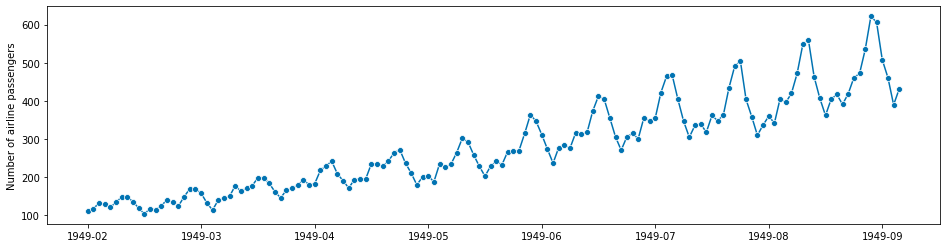

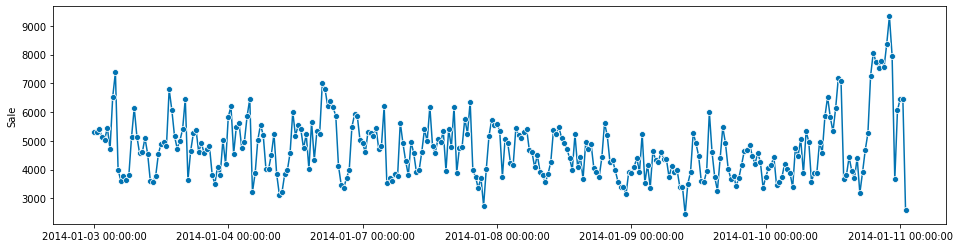

In [44]:
#test
y= load_airline()
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = pd.read_csv(os.path.basename(file), header = 0, parse_dates=True, index_col = 0, squeeze = True)
#series = pd.Series(data=['Sale'], index=file.index)
df = df.sort_index()

df.iloc[0]
plot_series(y)
plot_series(df)
#print(series.head())
#series.index=series.index.map(str)
#series.plot()

In [45]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144, freq='M')

In [46]:
df.index = df.index.to_period("D")
df.index

PeriodIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-07',
             '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11',
             '2014-01-12', '2014-01-13',
             ...
             '2014-12-18', '2014-12-19', '2014-12-20', '2014-12-22',
             '2014-12-23', '2014-12-24', '2014-12-27', '2014-12-29',
             '2014-12-30', '2014-12-31'],
            dtype='period[D]', name='Date', length=303, freq='D')

108 36
float64


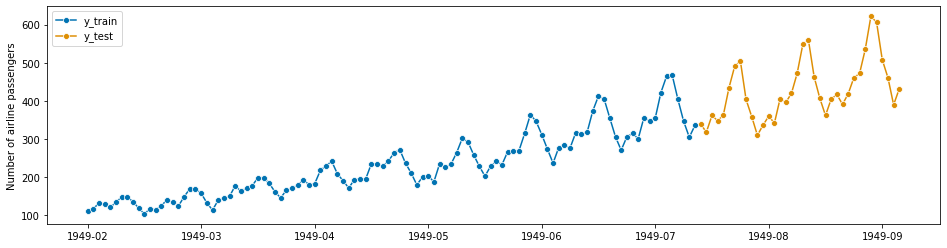

In [47]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])
print(y_train.dtype)

219 84
float64


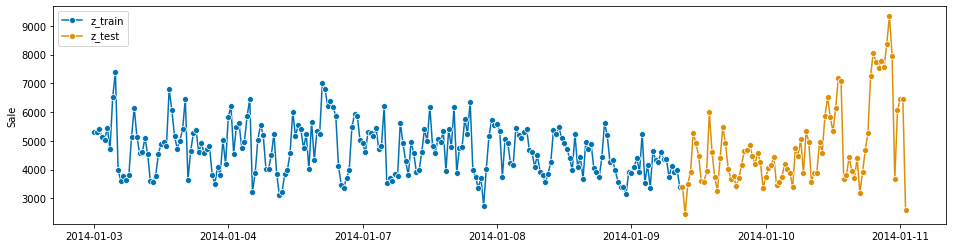

In [48]:
z_train, z_test = temporal_train_test_split(df, test_size=84)
plot_series(z_train, z_test, labels=["z_train", "z_test"])
print(z_train.shape[0], z_test.shape[0])
#z_train.plot()
#z_test.plot()
#print('train_length:',z_train.shape, '\n test_length:', z_test.shape)
z_train = z_train.astype(np.float64)
print(z_train.dtype)

In [49]:
fh = np.arange(len(y_test)) + 1
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [50]:
fz = np.arange(len(z_test)) +1
#fz = ForecastingHorizon(z_test .index, is_relative=False)
fz

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

1958-01    336.0
1958-02    336.0
1958-03    336.0
1958-04    336.0
1958-05    336.0
1958-06    336.0
1958-07    336.0
1958-08    336.0
1958-09    336.0
1958-10    336.0
1958-11    336.0
1958-12    336.0
1959-01    336.0
1959-02    336.0
1959-03    336.0
1959-04    336.0
1959-05    336.0
1959-06    336.0
1959-07    336.0
1959-08    336.0
1959-09    336.0
1959-10    336.0
1959-11    336.0
1959-12    336.0
1960-01    336.0
1960-02    336.0
1960-03    336.0
1960-04    336.0
1960-05    336.0
1960-06    336.0
1960-07    336.0
1960-08    336.0
1960-09    336.0
1960-10    336.0
1960-11    336.0
1960-12    336.0
Freq: M, dtype: float64


0.23195770387951434

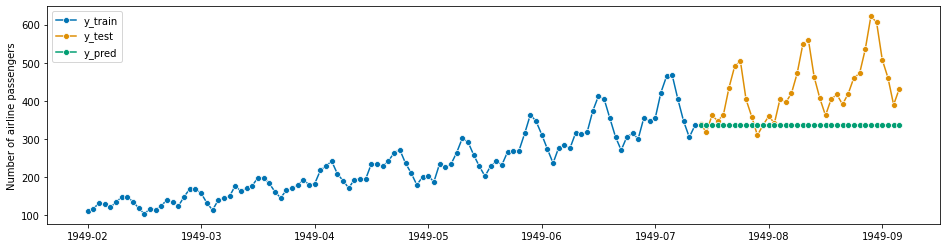

In [51]:
# Naive using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
print(y_pred)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

2014-09-24    3407.0
2014-09-25    3407.0
2014-09-26    3407.0
2014-09-27    3407.0
2014-09-28    3407.0
               ...  
2014-12-12    3407.0
2014-12-13    3407.0
2014-12-14    3407.0
2014-12-15    3407.0
2014-12-16    3407.0
Freq: D, Length: 84, dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Sale'>)

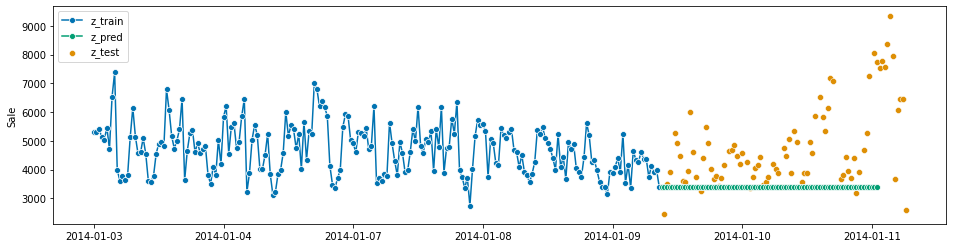

In [52]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
print(z_pred)
plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
#smape_loss(z_pred, z_test)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

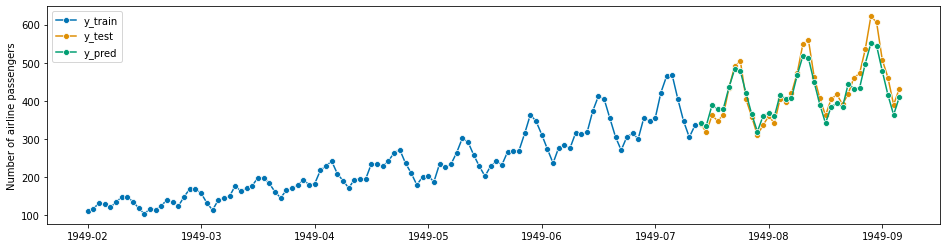

In [67]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(y_test, y_pred)


C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2014-09-24    4154.682097
2014-09-25    4367.755567
2014-09-26    4538.874313
2014-09-27    5088.635881
2014-09-28    5059.072985
                 ...     
2014-12-12    5964.156669
2014-12-13    6076.001660
2014-12-14    5947.581370
2014-12-15    5825.609186
2014-12-16    5766.351298
Freq: D, Length: 84, dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Sale'>)

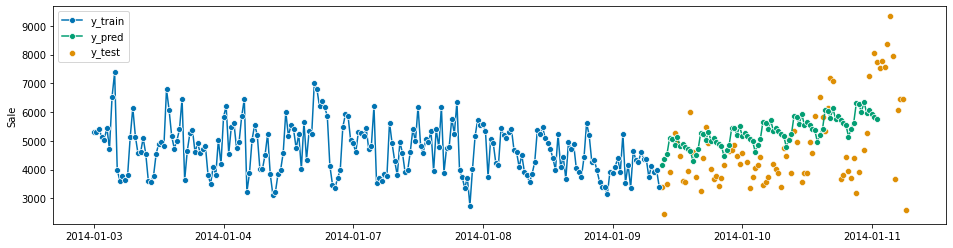

In [85]:
forecaster = ExponentialSmoothing(trend="mul", seasonal="mul", sp=12)
#forecaster = ExponentialSmoothing(trend=None,
                                  #seasonal=None, sp=None)
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
print(z_pred)
plot_series(z_train, z_test, z_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(z_test, z_pred)

In [90]:
#Save pandas series to csv file
out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\es.csv', index=False, header=True)

2014-09-24    4154
2014-09-25    4367
2014-09-26    4538
2014-09-27    5088
2014-09-28    5059
              ... 
2014-12-12    5964
2014-12-13    6076
2014-12-14    5947
2014-12-15    5825
2014-12-16    5766
Freq: D, Length: 84, dtype: int32


<ipython-input-90-a265267fed12>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = z_pred.astype(np.int)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

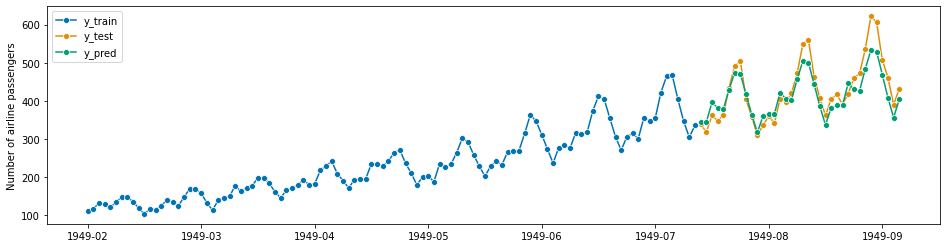

In [77]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(y_test, y_pred)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Sale'>)

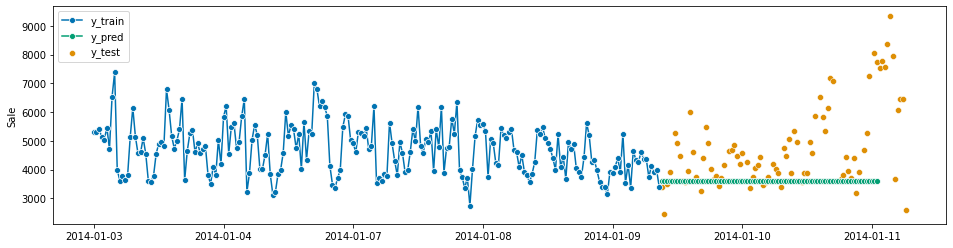

In [81]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=7, n_jobs=-1)
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
plot_series(z_train, z_test, z_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(z_test, z_pred)

In [76]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(y_test, y_pred)


TypeError: n_periods must be an int

In [ ]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

In [ ]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(z_train)
alpha = 0.05  # 95% prediction intervals
z_pred, pred_ints = forecaster.predict(fz, return_pred_int=True, alpha=alpha)
smape_loss(z_test, z_pred)
print(z_pred)


In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();

In [ ]:
fig, ax = plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();